# Import Libraries

In [47]:
import pandas
import numpy as np

from numpy import percentile
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import math
import matplotlib.ticker as mtick

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.gaussian_process.kernels import RBF
from xgboost import XGBRFClassifier

# Reading dataset and retrieve 1000 observations randomly (Run once)

In [2]:
# Read the dataset into a data table using Pandas
dataset = pandas.read_csv("Telco-Customer-Churn.csv")

#Selecting 1000 observations randomly
dataset = dataset.sample(n = 1000) 

#Creating Pandas data frame
dataframe = pd.DataFrame(data=dataset)

#Saving dataframe as csv file
dataframe.to_csv('Telco-Churn-Final-Data.csv')

# Reading the dataset with 1000 observations only

In [3]:
# Read the dataset into a data table using Pandas (FINAL DATASET; AFTER RETRIEVING 1000 ROWS RANDOMLY)
data = pandas.read_csv("Telco-Churn-Final-Data.csv")

df = pd.DataFrame(data=data)

# Data Exploration - Statistical Summary, Common Data Error (Outliers, NA)

In [4]:
#Look at the first 5 rows of data 
print(df.head(5))

   Unnamed: 0  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0        5824  5321-NTRKC    Male              0     Yes        Yes      66   
1        6309  2169-RRLFW  Female              0     Yes         No      71   
2        3305  5144-TVGLP    Male              1      No         No      38   
3        5613  3913-FCUUW  Female              0     Yes        Yes      72   
4        5619  4619-EVPHY  Female              1     Yes         No      20   

  PhoneService MultipleLines InternetService  ...     DeviceProtection  \
0          Yes           Yes             DSL  ...                  Yes   
1          Yes           Yes              No  ...  No internet service   
2          Yes           Yes     Fiber optic  ...                   No   
3          Yes           Yes             DSL  ...                  Yes   
4          Yes            No     Fiber optic  ...                   No   

           TechSupport          StreamingTV      StreamingMovies  \
0           

In [5]:
#Understanding how many rows and columns there are 
print(df.shape)

(1000, 22)


In [6]:
#Understanding data types
Data_type = pd.DataFrame({'Data Type': df.dtypes})
Data_type

,Data Type
Unnamed: 0,int64
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [7]:
#Statistical Summary of numeric variables
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3556.869000,0.154000,32.096000,64.283800,2261.575300
std,2059.855439,0.361129,24.288324,29.747261,2253.496908
min,1.000000,0.000000,1.000000,18.800000,18.800000
25%,1783.500000,0.000000,9.000000,35.625000,368.587500
50%,3574.500000,0.000000,28.000000,69.775000,1390.225000
75%,5385.750000,0.000000,54.000000,89.550000,3869.662500
max,7033.000000,1.000000,72.000000,116.950000,8594.400000


In [8]:
#Identify if there are duplicates
duplicates = df[df.duplicated(keep=False)]
print("Duplicate rows:")
print(duplicates)

Duplicate rows:
Empty DataFrame
Columns: [Unnamed: 0, customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 22 columns]


In [9]:
#Find out if there are any missing values
missingvalues = pd.DataFrame({'Number of Missing Values': df.isnull().sum()})
missingvalues

,Number of Missing Values
Unnamed: 0,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


# Data Preparation - Remove missing value, Changing data type 

In [11]:
#Changing data type to float (TOTAL CHARGES)
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [12]:
#2 Missing values for 'Total Charges'; remove the missing values 
df.dropna(inplace = True)

In [13]:
del df['Unnamed: 0']

In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5321-NTRKC,Male,0,Yes,Yes,66,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),79.85,5234.95,No
1,2169-RRLFW,Female,0,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.60,1888.25,No
2,5144-TVGLP,Male,1,No,No,38,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,94.75,3653.00,No
3,3913-FCUUW,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),70.45,5165.70,No
4,4619-EVPHY,Female,1,Yes,No,20,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,One year,Yes,Bank transfer (automatic),91.00,1859.50,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,7802-EFKNY,Male,0,Yes,No,5,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.95,100.40,Yes
996,1502-XFCVR,Female,0,No,No,58,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.45,6145.85,Yes
997,6050-IJRHS,Female,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,106.50,7397.00,No
998,7967-HYCDE,Male,0,No,No,8,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),70.70,553.40,No


# Data Exploration - Univariate Analysis

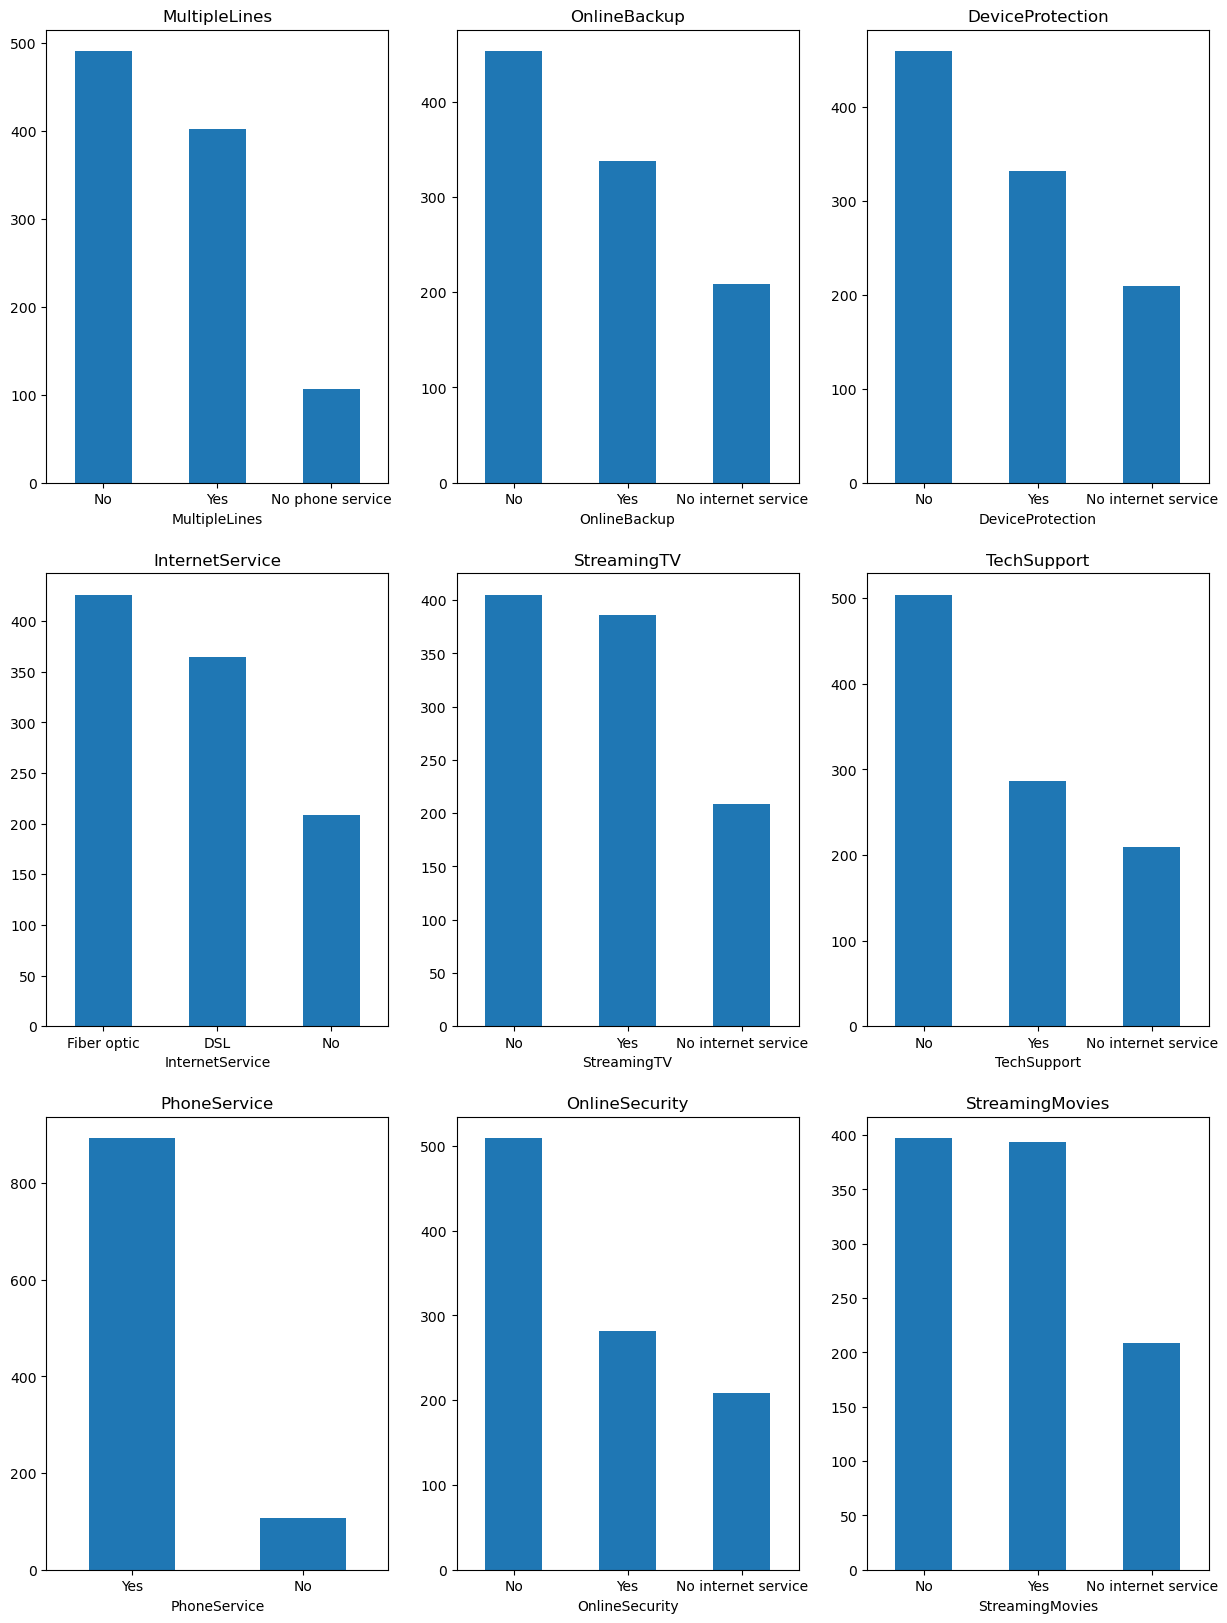

In [18]:
categoricaldata = ['MultipleLines','InternetService','PhoneService','OnlineBackup',
           'StreamingTV','OnlineSecurity','DeviceProtection','TechSupport','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,20))
for i, item in enumerate(categoricaldata):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Text(0.5, 1.0, 'Percentage of Churn')

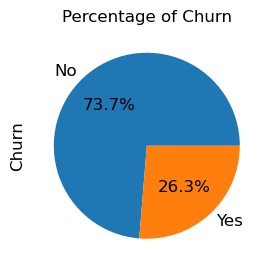

In [19]:
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(3,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Percentage of Churn', fontsize = 12)

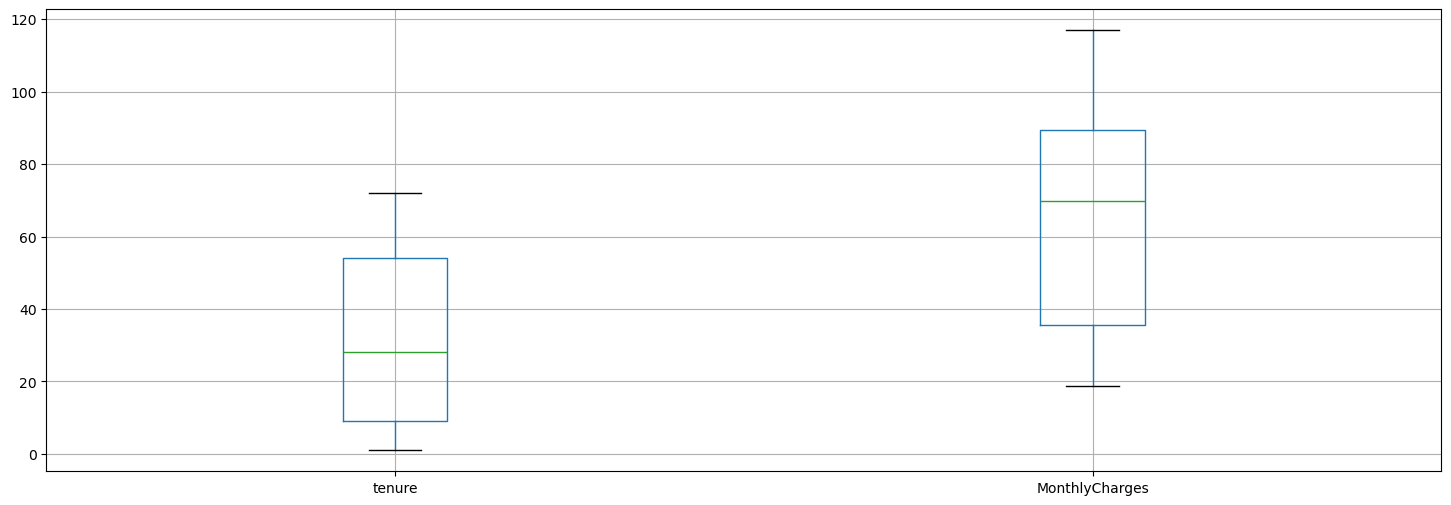

In [20]:
#Box PLot - Find out if there are any outliers
num_cols = ['tenure','MonthlyCharges']
plt.figure(figsize=(18,6))
df[num_cols].boxplot()
plt.show()

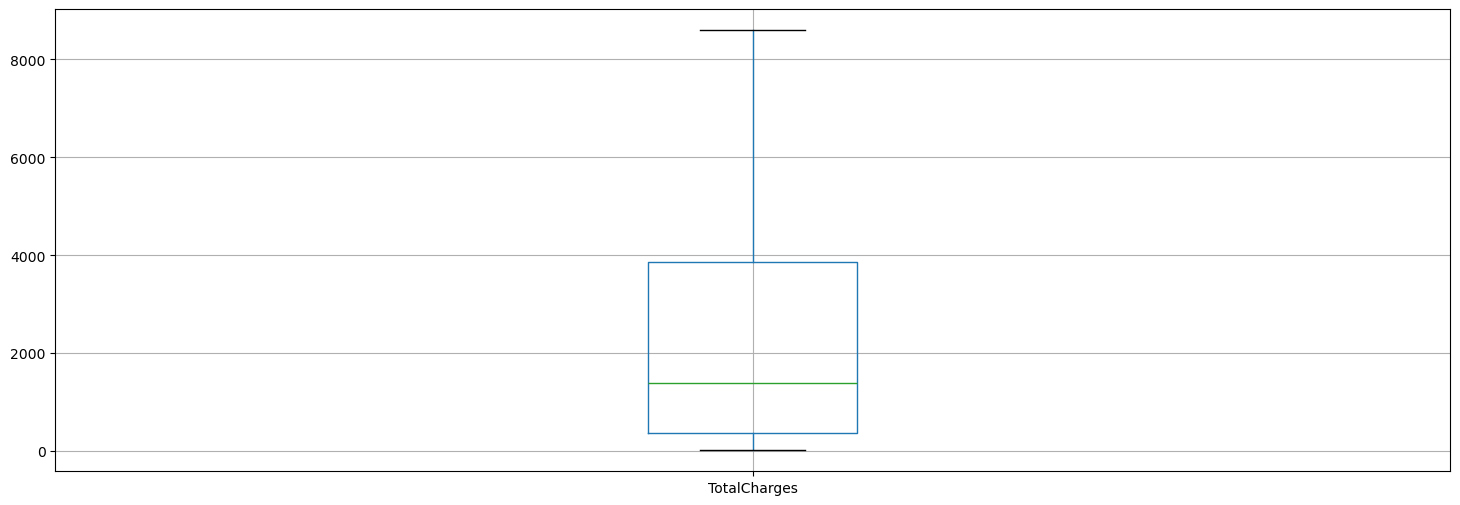

In [21]:
#Box PLot - Find out if there are any outliers
num_cols = ['TotalCharges']
plt.figure(figsize=(18,6))
df[num_cols].boxplot()
plt.show()

# Label Encoding

In [22]:
#Converting the gender feature into binary data
df.Churn.replace(["Yes", "No"], ["1", "0"], inplace = True)

# Data Exploration - Bivariate analysis 

Text(0.5, 1.0, 'Does Gender affect churn rate?')

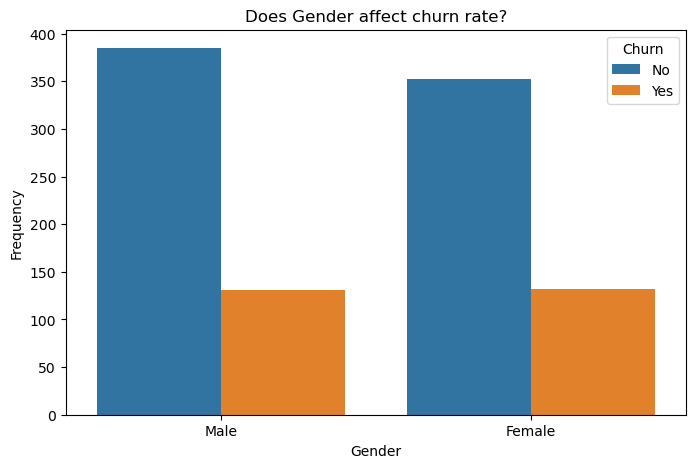

In [23]:
#Does Gender affect the churn rate? (More males will churn)
plt.figure(figsize=(8,5))
sns.countplot(x=data["gender"],hue=data["Churn"]);
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title('Does Gender affect churn rate?')

Text(0.5, 1.0, 'Are seniors less likely to churn?')

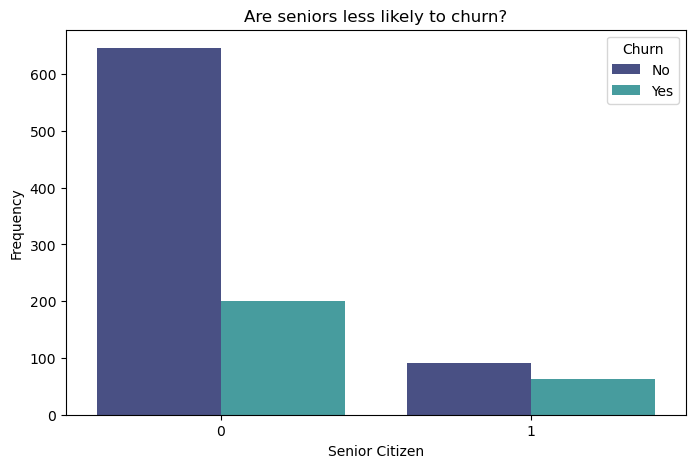

In [24]:
#Are seniors more like to churn?
plt.figure(figsize=(8,5))
sns.countplot(x=data["SeniorCitizen"],hue=data["Churn"],palette='mako');
plt.xlabel("Senior Citizen")
plt.ylabel("Frequency")
plt.title('Are seniors less likely to churn?')

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


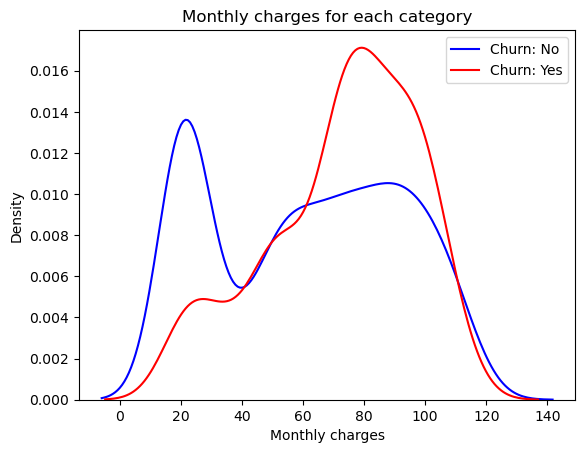

In [25]:
#Find out the relationship between monthly charges and churn (Does customers who pay a higher monthly charge more likely to churn?)
sns.kdeplot(df[df["Churn"]=='0']["MonthlyCharges"],color='blue',label='Churn: No')
sns.kdeplot(df[df["Churn"]=='1']["MonthlyCharges"],color='red',label='Churn: Yes')
plt.legend()
plt.title("Monthly charges for each category")
plt.xlabel("Monthly charges")
plt.show()

# Data Exploration - Multivariate Analysis

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

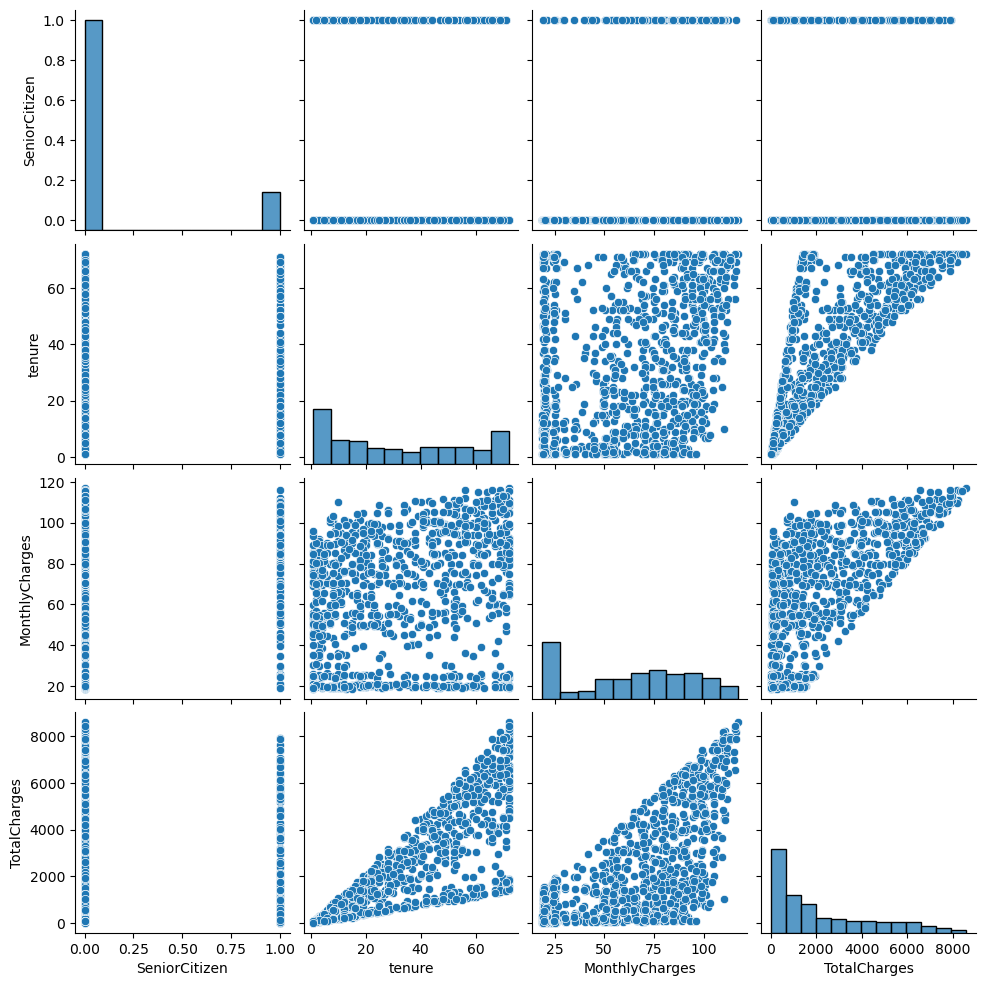

In [26]:
sp = sns.pairplot(df, height = 2.5)

# Feature Engineering - Removing Features 

In [27]:
#Deleting features that are not important for the prediction of customer churn
del df['PaperlessBilling']
del df['PaymentMethod']
del df['customerID']

# Feature Engineering - Binning

In [28]:
#Binning the feature: Tenure 
df['Tenure'] = pd.cut(x=df['tenure'], bins=[0,12,24,36,48,60,72], labels=['1 to 12', '13 to 24', '25 to 36','37 to 48','49 to 60','61 to 72'])

In [29]:
#Delete original tenure column - To use the binned column for prediction
del df['tenure']

# Feature Engineering - One-Hot Encoding

In [30]:
#Replace categorical data with one-hot encoded data
dataset_df = pd.get_dummies(df, columns=['Partner','gender', 'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                                         'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Tenure','Contract'])

In [31]:
dataset_df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,gender_Female,gender_Male,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Tenure_1 to 12,Tenure_13 to 24,Tenure_25 to 36,Tenure_37 to 48,Tenure_49 to 60,Tenure_61 to 72,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,79.85,5234.95,0,False,True,False,True,False,True,...,True,False,False,False,False,False,True,False,False,True
1,0,25.60,1888.25,0,False,True,True,False,True,False,...,False,False,False,False,False,False,True,False,False,True
2,1,94.75,3653.00,0,True,False,False,True,True,False,...,True,False,False,False,True,False,False,True,False,False
3,0,70.45,5165.70,0,False,True,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,1,91.00,1859.50,0,False,True,True,False,True,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24.95,100.40,1,False,True,False,True,True,False,...,False,True,False,False,False,False,False,True,False,False
996,0,106.45,6145.85,1,True,False,True,False,True,False,...,True,False,False,False,False,True,False,False,True,False
997,0,106.50,7397.00,0,False,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
998,0,70.70,553.40,0,True,False,False,True,True,False,...,False,True,False,False,False,False,False,True,False,False


# Correlation

<Axes: >

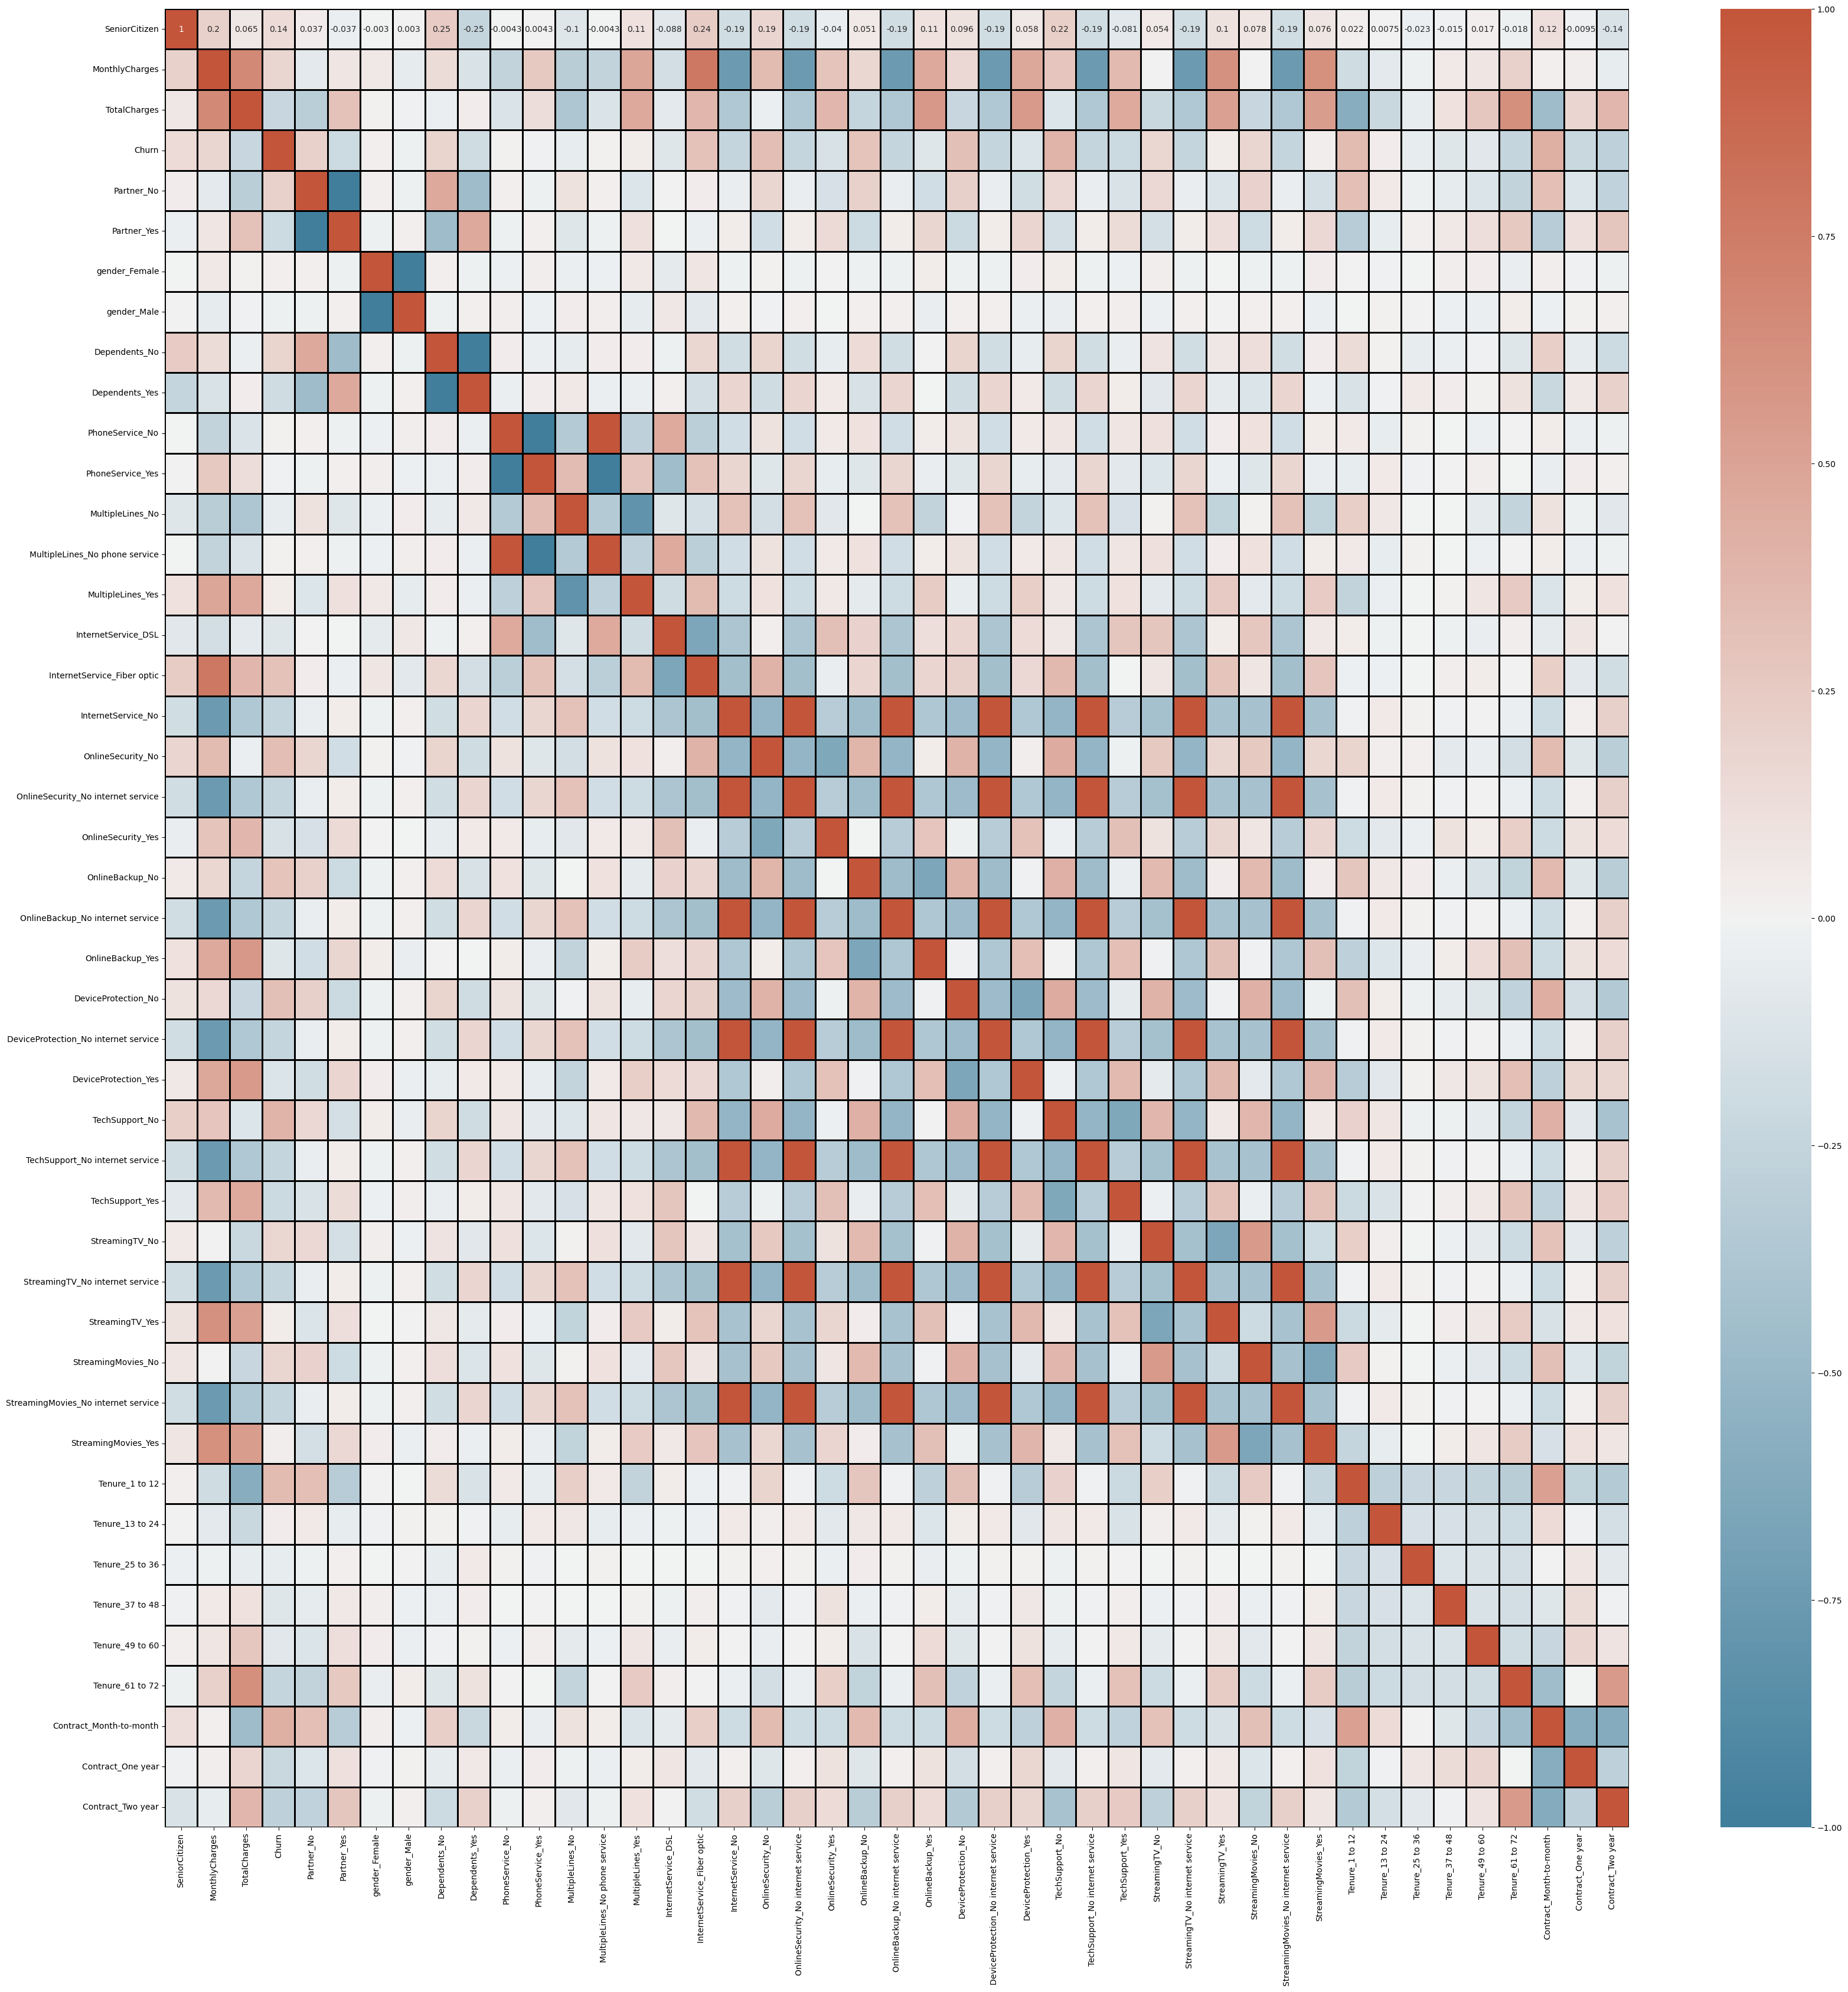

In [32]:
#Finding out the correlation between numeric variables

corr = dataset_df.corr()
#Set up - configuration (figure size)
f, ax = plt.subplots(figsize=(40,40))

#Heatmap Color 
cmap = sns.diverging_palette(230, 20, as_cmap=True)

#Print Heatmap
sns.heatmap(corr, annot=True, cmap=cmap,linewidths=2, vmin=-1, vmax=1, linecolor='black')

# Shuffle Data

In [33]:
dataset_df = dataset_df.sample(frac = 1)

# Define features and target variable & Data Partition

In [34]:
# Copy dataframe to new variable
data = dataset_df.copy(deep = True)

# Assign data to x and y
y = data['Churn']

cols = [col for col in data.columns if col not in ['Churn']]
x = data[cols]

del data['Churn']

# Split data into test and train datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 7)

# Training Model - Decision Tree

In [35]:
#Decision Tree
DT = DecisionTreeClassifier()
result = DT.fit(x_train, y_train)
predict_test = DT.predict(x_test)
DTaccuracy = metrics.accuracy_score(y_test, predict_test)
print(DTaccuracy)

0.69


# Training Model - K-Nearest Neighbours

In [36]:
#K-Nearest Neighbours
KNN = KNeighborsClassifier()
result = KNN.fit(x_train, y_train)
predict_test = KNN.predict(x_test)
KNNaccuracy = metrics.accuracy_score(y_test, predict_test)
print(KNNaccuracy)

0.7566666666666667


# Training Model - Gaussian Naive Bayes

In [37]:
#Gaussian Naive Bayes
GNB = GaussianNB()
result = GNB.fit(x_train, y_train)
predict_test = GNB.predict(x_test)
GNBaccuracy = metrics.accuracy_score(y_test, predict_test)
print(GNBaccuracy)

0.6866666666666666


# Training Model - Random Forest Classifier

In [38]:
#Random Forest Classifier
RF = RandomForestClassifier(random_state = 7)
result = RF.fit(x_train, y_train)
predict_test = RF.predict(x_test)
RFaccuracy = metrics.accuracy_score(y_test, predict_test)
print(RFaccuracy)

0.7933333333333333


# Training Model - Gradient Boosting Classifier

In [39]:
#Gradient Boosting Classifier
GB = GradientBoostingClassifier(random_state = 7)
result = GB.fit(x_train, y_train)
predict_test = GB.predict(x_test)
GBaccuracy = metrics.accuracy_score(y_test, predict_test)
print(GBaccuracy)

0.7866666666666666


# Training Model - AdaBoost Classifier

In [40]:
#AdaBoost Classifier
ABC = AdaBoostClassifier(random_state = 7)
result = ABC.fit(x_train, y_train)
predict_test = ABC.predict(x_test)
ABCaccuracy = metrics.accuracy_score(y_test, predict_test)
print(ABCaccuracy)

0.7966666666666666


# Training Model - XGBRG Classifier

In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#XGB Classifier
XGB = XGBRFClassifier(random_state=7)
result = XGB.fit(x_train, y_train_encoded)
predict_test = XGB.predict(x_test)
XGBaccuracy = metrics.accuracy_score(y_test_encoded, predict_test)
print(XGBaccuracy)

0.7933333333333333


In [53]:
#empty array
Model_Accuracy = []
Model = []

#Append the name of models into the empty array 'Model'
Model.append(('Decision Tree'))
Model.append(('K-Nearest Neighbour'))
Model.append(('Gaussian Naive Bayes'))
Model.append(('Random Forest'))
Model.append(('AdaBoost Classifier'))
Model.append(('XGBRF Classifier'))
Model.append(('Gradient Boosting Classifier'))

#Append the model accuracy into the empty array 'Model_Accuracy'
Model_Accuracy.append((DTaccuracy))
Model_Accuracy.append((KNNaccuracy))
Model_Accuracy.append((GNBaccuracy))
Model_Accuracy.append((RFaccuracy))
Model_Accuracy.append((ABCaccuracy))
Model_Accuracy.append((XGBaccuracy))
Model_Accuracy.append((GBaccuracy))

# Print accuracy of all the models for easier comparison

In [54]:
Accuracy = pd.DataFrame(data = Model_Accuracy, index = Model, 
                  columns =["Accuracy"])
Accuracy

,Accuracy
Decision Tree,0.690000
K-Nearest Neighbour,0.756667
Gaussian Naive Bayes,0.686667
Random Forest,0.793333
AdaBoost Classifier,0.796667
XGBRF Classifier,0.793333
Gradient Boosting Classifier,0.786667


# Best 3 models based on default settings: XGBRF Classifier, Random Forest & AdaBoostClassifier 

# Grid Search - AdaBoostClassifier

In [55]:
# Create the model
ABC = AdaBoostClassifier()


param_grid = {
    'n_estimators': [100, 300, 500, 800, 1000, 1200, 1600],
    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
}


gs_cv = GridSearchCV(ABC, param_grid, scoring = 'accuracy', cv = 3, n_jobs = 4, verbose=100)

# Run the grid search - on only the training data!
gs_cv.fit(x_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)


#Calculate accuracy of model after grid search
ABCAccuracy = metrics.accuracy_score(y_test, gs_cv.predict(x_test))
print('Accuracy:')
print(ABCAccuracy)

Fitting 3 folds for each of 49 candidates, totalling 147 fits
{'learning_rate': 0.01, 'n_estimators': 500}
Accuracy:
0.81


# Grid Search - XGBRF Classifier

In [57]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create the model
XGBRF = XGBRFClassifier()


param_grid = {
        'min_child_weight': [1, 3, 5, 6, 8, 10],
        'gamma': [0.5, 1, 1.5, 2],
        'subsample': [0.5, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 8]
}


XGBRF_GS = GridSearchCV(XGBRF, param_grid, scoring = 'accuracy', cv = 2, n_jobs = 2, verbose=100)

# Run the grid search - on only the training data!
XGBRF_GS.fit(x_train, y_train_encoded)

# Print the parameters that gave us the best result!
print(XGBRF_GS.best_params_)
y_test_encoded = label_encoder.transform(y_test)


#Calculate accuracy of model after grid search
XGBRFAccuracy = metrics.accuracy_score(y_test_encoded, XGBRF_GS.predict(x_test))
print('Accuracy:')
print(XGBRFAccuracy)

Fitting 2 folds for each of 1152 candidates, totalling 2304 fits
{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 5, 'min_child_weight': 3, 'subsample': 1.0}
Accuracy:
0.8


# Grid Search on Random Forest

In [ ]:
# Create the model
RF = RandomForestClassifier()


param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [4,5,6,7,8],
        'max_features': ['auto', 'sqrt', 'log2'],
        'min_samples_leaf': [2,4,5,8,10],
        'n_estimators': [200, 300, 500, 800, 900, 1200, 1500]
}


RF_GS = GridSearchCV(RF, param_grid, scoring = 'accuracy', cv = 2, n_jobs = 2, verbose=100)

# Run the grid search - on only the training data!
RF_GS.fit(x_train, y_train)

# Print the parameters that gave us the best result!
print(RF_GS.best_params_)


#Calculate accuracy of model after grid search
RFAccuracy = metrics.accuracy_score(y_test, RF_GS.predict(x_test))
print('Accuracy:')
print(RFAccuracy)

Fitting 2 folds for each of 1050 candidates, totalling 2100 fits


# Best Performing Model

In [ ]:
XGBRF = XGBRFClassifier(
    min_child_weight=3, 
    gamma=0.5,
    subsample= 1.0,
    colsample_bytree= 0.8,
    max_depth= 8
)

XGBRF.fit(x_train, y_train)

XGBRFAccuracy = metrics.accuracy_score(y_test, XGBRF.predict(x_test))
print('Accuracy:')
print(XGBRFAccuracy)

# Save the trained model to a file so we can use it in other programs
joblib.dump(XGBRF, 'models//XGBRF.pkl')

# Feature Importance

In [ ]:
feature_labels = np.array(['gender_Female', 'gender_Male','SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Partner_No', 
                           'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No', 
                           'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 
                           'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_No internet service	','OnlineSecurity_Yes', 'OnlineBackup_No', 'OnlineBackup_No internet service', 
                           'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_No internet service	', 'DeviceProtection_Yes', 
                           'TechSupport_No', 'TechSupport_No internet service', 
                           'TechSupport_Yes', 'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 
                           'Tenure_1 to 12', 'Tenure_13 to 24', 'Tenure_25 to 36', 'Tenure_37 to 48','Tenure_49 to 60','Tenure_61 to 72','Contract_Month-to-month',
                          'Contract_One year','Contract_Two year'])

In [ ]:
#load the trained model created with train_model.py
model = joblib.load('models//XGBRF.pkl')

In [ ]:
#Create a numpy array based on the model's feature imprtances
importance = model.feature_importances_


#Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance=importance.argsort()


# Print each feature label, from most importance to least important(reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index]*100.0)))

# Removal of features that are not important

In [ ]:
new_xtrain = x_train.drop(["OnlineBackup_No internet service", "DeviceProtection_No internet service", "TechSupport_No internet service",
                           "StreamingTV_No internet service", "StreamingMovies_No internet service", "Dependents_Yes", "OnlineSecurity_No internet service", "Dependents_No",
                           "Tenure_49 to 60", "OnlineBackup_Yes", "OnlineBackup_No", "DeviceProtection_Yes", "StreamingMovies_Yes", "StreamingTV_No",
                           "Partner_No", "InternetService_No", "gender_Female", "StreamingMovies_No", "OnlineSecurity_Yes", "Tenure_13 to 24",
                           "Tenure_61 to 72", "MultipleLines_No phone service", "Tenure_25 to 36", "gender_Male", "TechSupport_Yes", "MultipleLines_Yes",
                           "StreamingTV_Yes", "MultipleLines_No", "OnlineSecurity_No"], axis=1)

new_xtest = x_test.drop(["OnlineBackup_No internet service", "DeviceProtection_No internet service", "TechSupport_No internet service",
                           "StreamingTV_No internet service", "StreamingMovies_No internet service", "Dependents_Yes", "OnlineSecurity_No internet service", "Dependents_No",
                           "Tenure_49 to 60", "OnlineBackup_Yes", "OnlineBackup_No", "DeviceProtection_Yes", "StreamingMovies_Yes", "StreamingTV_No",
                           "Partner_No", "InternetService_No", "gender_Female", "StreamingMovies_No", "OnlineSecurity_Yes", "Tenure_13 to 24",
                           "Tenure_61 to 72", "MultipleLines_No phone service", "Tenure_25 to 36", "gender_Male", "TechSupport_Yes", "MultipleLines_Yes",
                           "StreamingTV_Yes", "MultipleLines_No", "OnlineSecurity_No"], axis=1)

In [ ]:
new_xtest

In [ ]:
XGBRFClassifier = XGBRFClassifier(
    min_child_weight=3, 
    gamma=0.5,
    subsample= 1.0,
    colsample_bytree= 0.8,
    max_depth= 8
)

XGBRFClassifier.fit(new_xtrain, y_train)

XGBRFAccuracy = metrics.accuracy_score(y_test, XGBRFClassifier.predict(new_xtest))
print('Accuracy:')
print(XGBRFAccuracy)


# Checking feature importance again

In [ ]:
#load the trained model created with train_model.py
XGBRFFI = joblib.load('models//XGBRFUpdated.pkl')

In [ ]:
#Create a numpy array based on the model's feature imprtances
importance = XGBRFFI.feature_importances_


#Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance=importance.argsort()


# Print each feature label, from most importance to least important(reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index]*100.0)))

# Making predictions

In [ ]:
customer_churn = [
    1,        
    7450,     
    745,     
    1,   
    1, 
    0,     
    0,      
    0,   
    0,  
    1,   
    1,   
    1,     
    1,    
    1,
    1
]
              
                  
columns = ["SeniorCitizen", "MonthlyCharges", "TotalCharges", "Partner_Yes", "PhoneService_No", "PhoneService_Yes", "InternetService_DSL", "InternetService_Fiber optic", 
                  "DeviceProtection_No", "TechSupport_No", "Tenure_1 to 12", "Tenure_37 to 48", "Contract_Month-to-month", "Contract_One year", "Contract_Two year"]


df = pd.DataFrame.from_dict(zip(columns,customer_churn))
correct_df = df.T


new_header = correct_df.iloc[0] #grab the first row for the header
correct_df = correct_df[1:] #take the data less the header row
correct_df.columns = new_header #set the header row as the df header

for i in columns:
    correct_df[i] = pd.to_numeric(correct_df[i])
    
#print(correct_df.dtypes)
predicted_customer_churn = XGBRFFI.predict(correct_df)


predicted_value = predicted_customer_churn[0]


print("This customer will churn or not:", str(predicted_value))

# Saving trained model

In [ ]:
joblib.dump(XGBRFClassifier, 'models//XGBRFUpdated.pkl')

# Saving final dataset

In [ ]:
frames = [new_xtrain, new_xtest]

finaldata = pd.concat(frames)

In [ ]:
#Saving dataframe as csv file
finaldata.to_csv('Telco Churn Final Dataset.csv')